In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5278615039977049253
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15947459673181661261
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
#Importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
%matplotlib inline

from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, MaxPool1D, Convolution1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import (BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D,MaxPool2D

from tensorflow.keras.applications.efficientnet import EfficientNetB0

#from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [ ]:
#Loading the paths for the datasets
covid = os.listdir("/content/drive/MyDrive/Colab Notebooks/x-ray/train/COVID19")
normal = os.listdir("/content/drive/MyDrive/Colab Notebooks/x-ray/train/NORMAL")
pneumonia = os.listdir("/content/drive/MyDrive/Colab Notebooks/x-ray/train/PNEUMONIA")
tuber = os.listdir("/content/drive/MyDrive/Colab Notebooks/x-ray/train/TURBERCULOSIS")

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#Defining a funtion names "sampleimage" to view all types of images
def sampleimage(image_path):
    img = load_img(image_path)
    print((img_to_array(img)).shape)
    plt.imshow(img)
    plt.show()

COVID19
(885, 1036, 3)


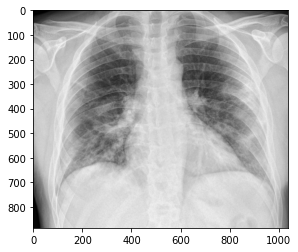

NORMAL
(1858, 2090, 3)


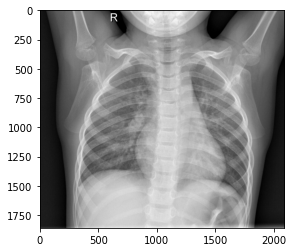

PNEUMONIA
(439, 712, 3)


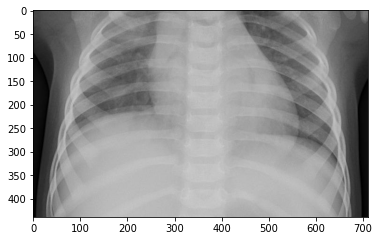

TURBERCULOSIS
(512, 512, 3)


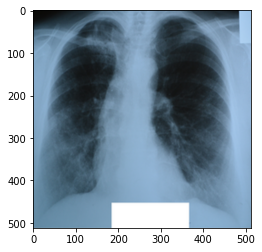

In [ ]:
labels = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

#COVID 19 image 
image_path="/content/drive/MyDrive/Colab Notebooks/x-ray/train/COVID19/COVID19(110).jpg"
print(labels[0])
sampleimage(image_path)
#Normal image 
print(labels[1])
image_path = "/content/drive/MyDrive/Colab Notebooks/x-ray/train/NORMAL/IM-0115-0001.jpeg"
sampleimage(image_path)
#Pneumonia image
print(labels[2])
image_path="/content/drive/MyDrive/Colab Notebooks/x-ray/train/PNEUMONIA/person1_bacteria_1.jpeg"
sampleimage(image_path)
#Turberculosis image
print(labels[3])
image_path = "/content/drive/MyDrive/Colab Notebooks/x-ray/train/TURBERCULOSIS/Tuberculosis-1.png"
sampleimage(image_path)

In [ ]:
labels = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']
x = []
Y = []
for i in labels:
    folder_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/x-ray", "train", i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (150, 150))
        x.append(img)
        Y.append(i)

In [ ]:
x = np.array(x)
Y = np.array(Y)

print(x.shape)
print(Y.shape)

(6356, 150, 150)
(6356,)


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = []
for i in Y:
    y.append(labels.index(i))
y = le.fit_transform(y)
y = tf.keras.utils.to_categorical(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=21)

In [ ]:
print("Train data shape       : ", x_train.shape[0])
print("Test data shape        : ", x_test.shape[0])
print("Train Input shape      : ", x_train.shape)
print("Train output shape     : ", y_train.shape)
print("Test input shape       : ", x_test.shape)
print("Test output shape      : ", y_test.shape)
print("Validation input shape : ", x_valid.shape)
print("Validation output shape: ", y_valid.shape)

Train data shape       :  4067
Test data shape        :  1272
Train Input shape      :  (4067, 150, 150)
Train output shape     :  (4067, 4)
Test input shape       :  (1272, 150, 150)
Test output shape      :  (1272, 4)
Validation input shape :  (1017, 150, 150)
Validation output shape:  (1017, 4)


In [ ]:
from tensorflow.keras.layers import LSTM 

In [ ]:
model =Sequential()
model.add(LSTM(400, activation = 'relu', return_sequences = True input_shape=(150, 150)))
model.add(LSTM(300, activation = 'relu'))
model.add(Dropout(0.15))
model.add(LSTM(200, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(4, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               100400    
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 100,804
Trainable params: 100,804
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

tensorboard = TensorBoard(log_dir = 'logs') 
# checkpoint = ModelCheckpoint(
#                              monitor="val_accuracy",
#                              save_best_only=True,
#                              mode="auto",
#                              verbose=1) 
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto',verbose=1)


In [ ]:
x_train.shape

(4067, 150, 150)

In [ ]:
hist = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data = (x_valid, y_valid))

Epoch 1/40
64/64 [==============================] - 4s 20ms/step - loss: 0.9073 - accuracy: 0.6418 - val_loss: 0.8619 - val_accuracy: 0.6549
Epoch 2/40
64/64 [==============================] - 1s 12ms/step - loss: 0.8298 - accuracy: 0.6671 - val_loss: 0.7941 - val_accuracy: 0.6735
Epoch 3/40
64/64 [==============================] - 1s 12ms/step - loss: 0.7469 - accuracy: 0.6806 - val_loss: 0.7161 - val_accuracy: 0.7011
Epoch 4/40
64/64 [==============================] - 1s 12ms/step - loss: 0.6909 - accuracy: 0.7153 - val_loss: 0.6808 - val_accuracy: 0.6794
Epoch 5/40
64/64 [==============================] - 1s 13ms/step - loss: 0.6626 - accuracy: 0.7325 - val_loss: 0.6402 - val_accuracy: 0.7493
Epoch 6/40
64/64 [==============================] - 1s 18ms/step - loss: 0.6390 - accuracy: 0.7463 - val_loss: 0.6267 - val_accuracy: 0.7414
Epoch 7/40
64/64 [==============================] - 2s 26ms/step - loss: 0.6172 - accuracy: 0.7561 - val_loss: 0.6091 - val_accuracy: 0.7660
Epoch 8/40
64

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy is: ', accuracy)
print("Test loss is    : ", loss)

40/40 [==============================] - 0s 5ms/step - loss: 0.5898 - accuracy: 0.7461
Test accuracy is:  0.7460691928863525
Test loss is    :  0.5898131132125854


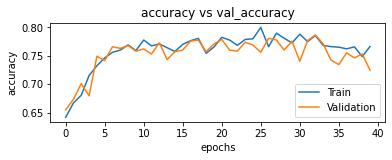

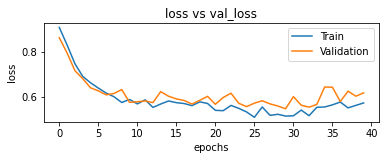

In [ ]:
plt.subplot(211)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy vs val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.subplot(212)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss vs val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix,f1_score
pred = model.predict(x_test)
pred.argmax(axis=1)
cm = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
print(cm)

[[  1   0  11  78]
 [  0 183  54  46]
 [  1  80 637  39]
 [  0  12   2 128]]


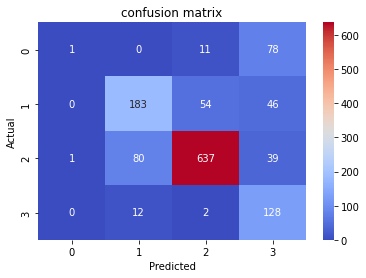

In [ ]:
import seaborn as sns

#cn1 = pd.DataFrame(cm, columns=labels, index=labels)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix')
plt.show()

In [ ]:
#Classification report
print(classification_report(y_test.argmax(axis=1), pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.50      0.01      0.02        90
           1       0.67      0.65      0.66       283
           2       0.90      0.84      0.87       757
           3       0.44      0.90      0.59       142

    accuracy                           0.75      1272
   macro avg       0.63      0.60      0.54      1272
weighted avg       0.77      0.75      0.73      1272



In [ ]:
print("F1 Score: ", f1_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='macro'))

F1 Score:  0.5352206507766828


In [ ]:
import pickle
pickle.dump(model, open('resnet_cnn.pkl', 'wb'))

In [ ]:
import joblib
joblib.dump(model, 'resnet_cnn_joblib.pkl')